# Pasos Generales
## Base de datos Iris Plant

### 1.- Cargar el dataset (ds)

In [1]:
import pandas as pd

In [2]:
ds = pd.read_csv('../datasets/iris_plant/iris_plant.csv')

In [3]:
ds.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### 2.- Reemplazar los valores del Target por 0, 1 y 2

In [4]:
ds["variety"] = ds["variety"].replace(["Setosa"],0)
ds["variety"] = ds["variety"].replace(["Versicolor"],1)
ds["variety"] = ds["variety"].replace(["Virginica"],2)

### 3.- Mostrar la distribución de los datos

In [5]:
import matplotlib.pyplot as plt

In [6]:
setosa = ds[ds["variety"]==0]
versicolor = ds[ds["variety"]==1]
virginica = ds[ds["variety"]==2]

### 3.1 Distribución por sépalos

Text(0.5,1,'Distribución por sépalos')

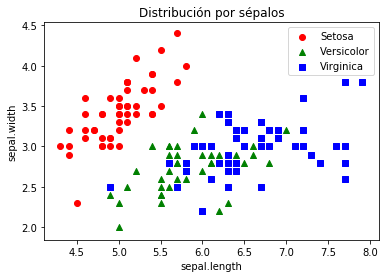

In [7]:
plt.scatter(x=setosa["sepal.length"],y=setosa["sepal.width"],color="red",marker="o")
plt.scatter(x=versicolor["sepal.length"],y=versicolor["sepal.width"],color="green",marker="^")
plt.scatter(x=virginica["sepal.length"],y=virginica["sepal.width"],color="blue",marker="s")
plt.legend(["Setosa","Versicolor","Virginica"])
plt.xlabel("sepal.length")
plt.ylabel("sepal.width")
plt.title("Distribución por sépalos")

Text(0.5,1,'Distribución ancho de sépalo y largo de pétalo')

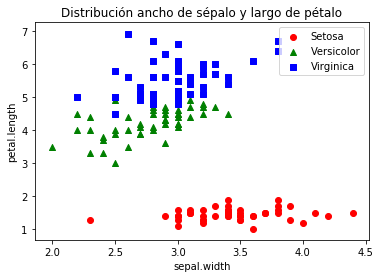

In [8]:
plt.scatter(x=setosa["sepal.width"],y=setosa["petal.length"],color="red",marker="o")
plt.scatter(x=versicolor["sepal.width"],y=versicolor["petal.length"],color="green",marker="^")
plt.scatter(x=virginica["sepal.width"],y=virginica["petal.length"],color="blue",marker="s")
plt.legend(["Setosa","Versicolor","Virginica"])
plt.xlabel("sepal.width")
plt.ylabel("petal.length")
plt.title("Distribución ancho de sépalo y largo de pétalo")

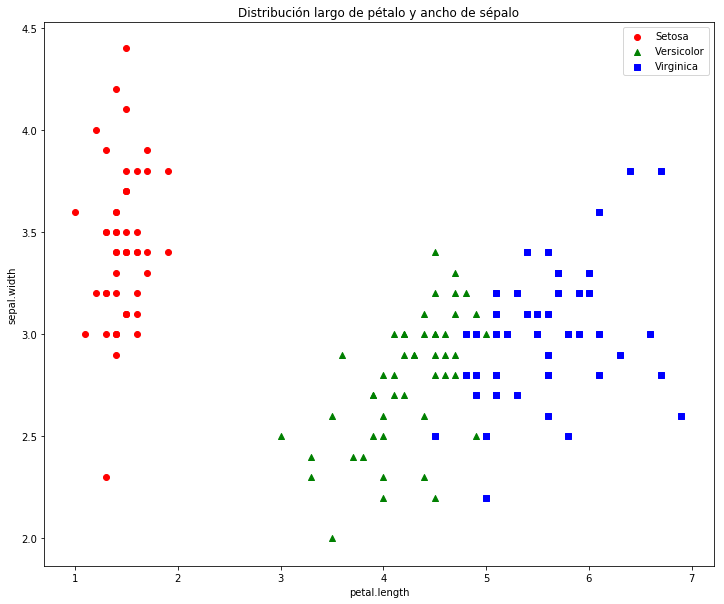

In [10]:
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.scatter(x=setosa["petal.length"],y=setosa["sepal.width"],color="red",marker="o")
plt.scatter(x=versicolor["petal.length"],y=versicolor["sepal.width"],color="green",marker="^")
plt.scatter(x=virginica["petal.length"],y=virginica["sepal.width"],color="blue",marker="s")
plt.legend(["Setosa","Versicolor","Virginica"])
plt.xlabel("petal.length")
plt.ylabel("sepal.width")
plt.title("Distribución largo de pétalo y ancho de sépalo")
plt.show()

### 3.2 Distribución por pétalos

Text(0.5,1,'Distribución por pétalos')

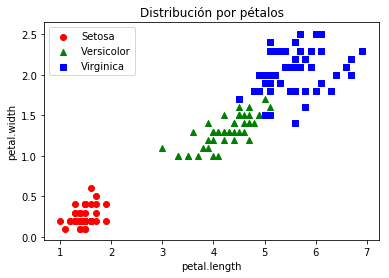

In [20]:
plt.scatter(x=setosa["petal.length"],y=setosa["petal.width"],color="red",marker="o")
plt.scatter(x=versicolor["petal.length"],y=versicolor["petal.width"],color="green",marker="^")
plt.scatter(x=virginica["petal.length"],y=virginica["petal.width"],color="blue",marker="s")
plt.legend(["Setosa","Versicolor","Virginica"])
plt.xlabel("petal.length")
plt.ylabel("petal.width")
plt.title("Distribución por pétalos")

### 4.- Dividir el conjunto en patrones (X) y clases (y)

In [21]:
X = ds[["sepal.length","sepal.width","petal.length","petal.width"]]
y = ds[["variety"]]

In [22]:
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
y.head()

,variety
0,0
1,0
2,0
3,0
4,0


### 5.- Matriz de correlación de (X)

In [30]:
import numpy as np

In [27]:
corr_ma = X.corr()
corr_ma

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


### 5.1 gráfica de la matriz de correlación

In [42]:
import seaborn as sbs

Text(0.5,1,'Matriz de correlación')

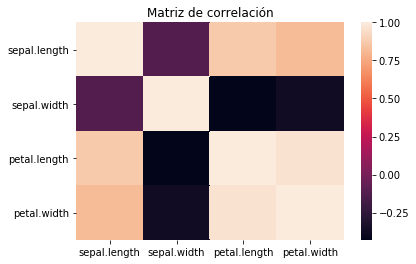

In [47]:
sbs.heatmap(corr_ma,xticklabels=X.columns.values,yticklabels=X.columns.values)
plt.title("Matriz de correlación")

### 5.2.- Gráfica Dispersión de las características

Text(0.5,1,'')

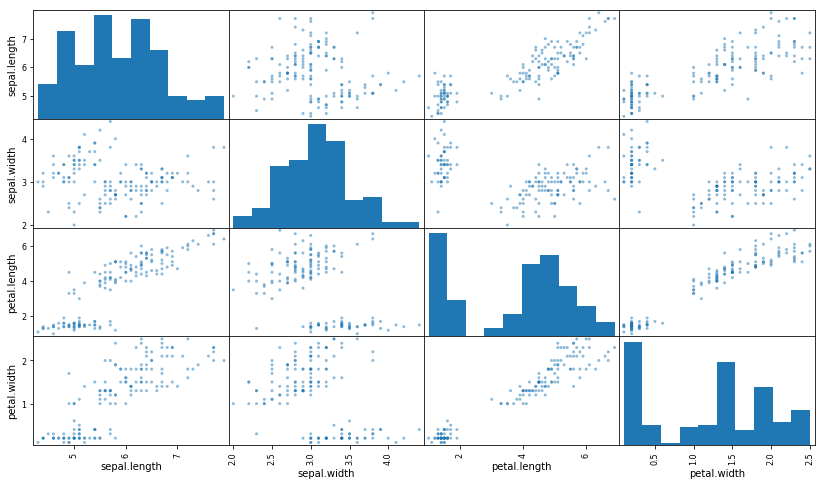

In [53]:
pd.plotting.scatter_matrix(X,figsize=(14,8))
plt.title("")

### 6.- Matriz de covarianza de (X)
¿Qué indica la Covarianza?

La covarianza positiva : cuando uno variable crece la otra variable también. Tienen una relación directa.

La covarianza negativa : cuando una variable crece la otra variable decrece. Tienen una relación Inversa.

In [55]:
cov_ma = X.cov()
cov_ma

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,0.685694,-0.042434,1.274315,0.516271
sepal.width,-0.042434,0.189979,-0.329656,-0.121639
petal.length,1.274315,-0.329656,3.116278,1.295609
petal.width,0.516271,-0.121639,1.295609,0.581006


### 6.1.- Obteniendo Eigen vectores y Eigen valores usando matriz de covarianza

In [62]:
eig_val,eig_vec = np.linalg.eig(cov_ma)
print("\nEigen valores \n%s"%eig_val)
print("\nEigen vectores \n%s"%eig_vec)


Eigen valores 
[4.22824171 0.24267075 0.0782095  0.02383509]

Eigen vectores 
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


### 6.2.- ¿Cuánta información aporta cada característica?

In [82]:
eigen_pairs = [(np.abs(eig_val[i]),eig_vec[:,i]) for i  in range(len(eig_val))]
eigen_pairs.sort()
eigen_pairs.reverse()
eigen_pairs

[(4.228241706034865,
  array([ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ])),
 (0.24267074792863333,
  array([-0.65658877, -0.73016143,  0.17337266,  0.07548102])),
 (0.07820950004291935,
  array([-0.58202985,  0.59791083,  0.07623608,  0.54583143])),
 (0.023835092973449296,
  array([ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]))]

In [80]:
print("valores propios en orden descendente")
for ep in eigen_pairs:
    print(ep[0])

valores propios en orden descendente
4.228241706034865
0.24267074792863333
0.07820950004291935
0.023835092973449296


In [73]:
#varianza explicativa
#el resultado contiene primera dimension, segunda dimension, tercera dimension y cuarta dimension
total_sum = sum(eig_val)
var_exp = [(i/total_sum)*100 for i in sorted(eig_val,reverse=True)]
var_exp

[92.46187232017272, 5.3066483117067795, 1.7102609807929752, 0.5212183873275343]

In [81]:
#varianza acumulada explicativa (componentes)
#el resoltado contiene varianza explicada usando:
#solo una dimension, dos dimensiones, tres dimensiones y cuatro dimensiones
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 92.46187232,  97.76852063,  99.47878161, 100.        ])

### 7.- Análisis Principal de componentes (PCA)

In [83]:
from sklearn.decomposition import PCA

### 7.1 Obtener nuevo espacio vectorial (X_reduced)
Este nuevo espacio queda reducido al número de componentes que identificamos en el paso anterior

In [85]:
pca = PCA(n_components=2)

In [89]:
X_reduced = pca.fit_transform(X)

### 8.- Exportar (X_reduced) y (y) a un archivo csv
El archivo csv se guarda en la carpeta datasets de reconocimiento de patrones con el nombre PCA_iris_plant.csv

In [91]:
X_reduced = pd.DataFrame(X_reduced)

In [93]:
X_reduced.to_csv('../datasets/X_reduced.csv',index=False)
y.to_csv("../datasets/y.csv",index=False)

### 8.1 Recuperando el nuevo conjunto de datos
Este nuevo conjunto de datos esta reducido a dos componentes

In [94]:
ds_nuevo = pd.read_csv("../datasets/iris_plant/PCA_iris_plant.csv")

In [95]:
ds_nuevo.head()

,x1,x2,variety
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


### 8.2.- Graficar la nueva distribución

In [98]:
setosa = ds_nuevo[ds_nuevo["variety"]==0]
versicolor = ds_nuevo[ds_nuevo["variety"]==1]
virginica = ds_nuevo[ds_nuevo["variety"]==2]

Text(0.5,1,'Distribución 2 componentes')

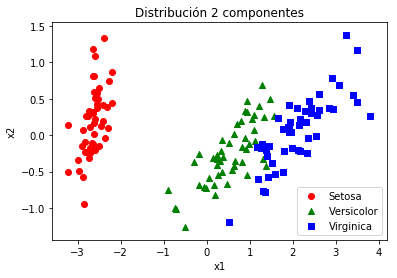

In [101]:
plt.scatter(x=setosa["x1"],y=setosa["x2"],color="red",marker="o")
plt.scatter(x=versicolor["x1"],y=versicolor["x2"],color="green",marker="^")
plt.scatter(x=virginica["x1"],y=virginica["x2"],color="blue",marker="s")
plt.legend(["Setosa","Versicolor","Virginica"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Distribución 2 componentes")

In [105]:
X = ds_nuevo[["x1","x2"]]
y = ds_nuevo[["variety"]]

Text(0.5,1,'')

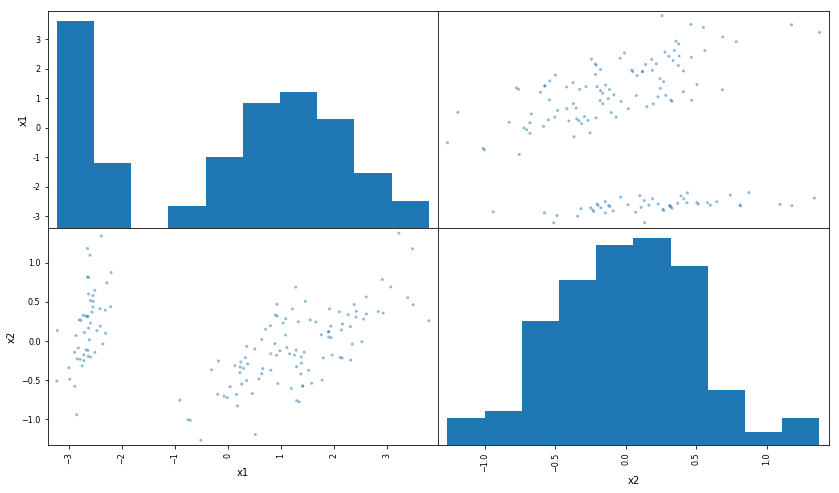

In [106]:
pd.plotting.scatter_matrix(X,figsize=(14,8))
plt.title("")